This notebook uses the SGD-Classifier to classify whether a PA will be approved or denied. 

1.   Loading libraries and data
2.   SGD-Classifier
     1. Logistic Regression with SGD training
     2. Linear SVM with SGD training
3.   Model improvement 
     1. Performance comparison of the different linear models
     2. GridSearch
4.   Test set performance


The code in this notebook is in part an adaptation from the code found [here](https://michael-fuchs-python.netlify.app/2019/11/11/introduction-to-sgd-classifier/#sgd-classifier)




1.   **Loading libraries and data**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
##Import data
from google.colab import files
uploaded = files.upload()

Saving x_train.csv to x_train.csv
Saving y_train.csv to y_train.csv


In [4]:
X = pd.read_csv('x_train.csv')
y = pd.read_csv('y_train.csv').squeeze()

In [ ]:
X.head()

,calendar_month,calendar_day,day_of_week,tried_and_failed,contraindication,drug_A,drug_B,drug_C,bin_417380,bin_417614,bin_417740,bin_999001,reject_code_70.0,reject_code_75.0,reject_code_76.0
0,10,26,6,0,0,0,1,0,0,0,0,1,0,0,1
1,9,21,5,1,0,0,1,0,0,1,0,0,0,1,0
2,8,29,3,0,0,1,0,0,0,0,0,1,0,0,1
3,10,4,4,1,0,1,0,0,0,1,0,0,1,0,0
4,2,7,5,0,0,0,1,0,0,0,1,0,1,0,0



2. **SGD-Classifier**

   1. **Logistic Regression with SGD**



In [ ]:
#Create Classifier object
clf = SGDClassifier(loss="log", penalty="l2", max_iter=100, tol=-np.infty)

#Create KFold object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=4124)

#Create performances matrices 
cv_accs = np.zeros((5,1))
cv_aucs = np.zeros((5,1))

i = 0
for train_index, test_index in kfold.split(X, y):
    print(i)
    # this gets the training and holdout sets
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_val = X.iloc[test_index]
    y_val = y.iloc[test_index]

    ## make model clones
    clf_clone = clone(clf)
    clf_clone.fit(X_train, y_train)
    clf_clone_preds = clf_clone.predict(X_val)

    ## record the performances
    cv_accs[i,0] = accuracy_score(y_val, clf_clone_preds)
    cv_aucs[i,0] = roc_auc_score(y_val, clf_clone_preds)

    i = i + 1

0
1
2
3
4


In [ ]:
## Accuracy
100*np.mean(cv_accs, axis=1)

array([80.83573163, 81.2471895 , 80.83573163, 81.46865725, 79.66094073])

In [ ]:
## Roc Auc
100*np.mean(cv_aucs, axis=1) 

array([75.71624463, 70.36631156, 74.58510018, 72.56043996, 78.22071031])

In [ ]:
## Instead of a fixed value in the number of iterations, I will explore if 
## changing the number of iterations parameter has an influence on my selected 
## perfomance metrics. 
n_iters = [5, 10, 20, 50, 100, 200, 500, 1000]

#Create performances matrices 
cv_accs_with_iters = np.zeros((5,len(n_iters)))
cv_aucs_with_iters = np.zeros((5,len(n_iters)))

i = 0
for train_index, test_index in kfold.split(X, y):
    #print(i)
    # this gets the training and holdout sets
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_val = X.iloc[test_index]
    y_val = y.iloc[test_index]

    j = 0
    for n_iter in n_iters:
      #print(j)
      clf = SGDClassifier(loss="log", penalty="l2", max_iter=n_iter, tol=-np.infty)
      clf.fit(X_train, y_train)
      #clf_preds = clf.predict(X_val)

      ## record the performances
      cv_accs_with_iters[i,j] = accuracy_score(y_val, clf.predict(X_val))
      cv_aucs_with_iters[i,j] = roc_auc_score(y_val, clf.predict(X_val))

      j = j + 1 

    i = i + 1

In [ ]:
## Accuracy
100*np.mean(cv_accs_with_iters, axis=0)

array([76.6705639 , 79.91770843, 81.00616063, 80.8561921 , 81.3625326 ,
       81.20829211, 81.33600144, 81.43088407])

In [ ]:
## Roc Auc
100*np.mean(cv_aucs_with_iters, axis=0) 

array([76.28546949, 74.5655682 , 71.57716596, 74.2200891 , 71.24596073,
       71.47746232, 72.80879823, 72.35147125])

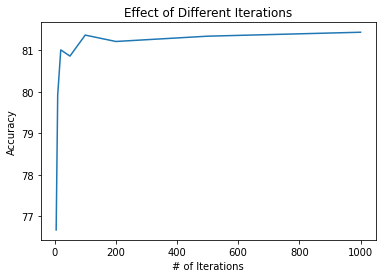

In [ ]:
plt.title("Effect of Different Iterations")
plt.xlabel("# of Iterations")
plt.ylabel("Accuracy")
plt.plot(n_iters, 100*np.mean(cv_accs_with_iters, axis=0)) 
plt.show()

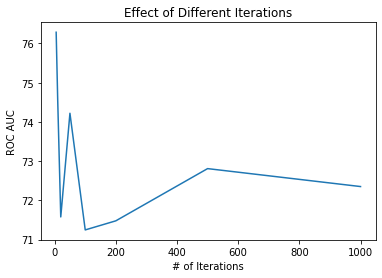

In [ ]:
plt.title("Effect of Different Iterations")
plt.xlabel("# of Iterations")
plt.ylabel("ROC AUC")
plt.plot(n_iters, 100*np.mean(cv_aucs_with_iters, axis=0)) 
plt.show()

2. **SGD-Classifier**

  2. **Logistic Regression with SGD**

In [ ]:
#Create Classifier object
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=100, tol=-np.infty)

#Create KFold object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=4124)

#Create performances matrices 
cv_accs = np.zeros((5,1))
cv_aucs = np.zeros((5,1))

i = 0
for train_index, test_index in kfold.split(X, y):
    print(i)
    # this gets the training and holdout sets
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_val = X.iloc[test_index]
    y_val = y.iloc[test_index]

    ## make model clones
    clf_clone = clone(clf)
    clf_clone.fit(X_train, y_train)
    clf_clone_preds = clf_clone.predict(X_val)

    ## record the performances
    cv_accs[i,0] = accuracy_score(y_val, clf_clone_preds)
    cv_aucs[i,0] = roc_auc_score(y_val, clf_clone_preds)

    i = i + 1

0
1
2
3
4


In [ ]:
## Accuracy
100*np.mean(cv_accs, axis=1)

array([81.49114129, 80.48385646, 80.79413616, 81.07968342, 81.02797014])

In [ ]:
## Roc Auc
100*np.mean(cv_aucs, axis=1) 

array([73.35281719, 74.4698821 , 74.35542021, 74.54846348, 73.25372813])

In [ ]:
## Change iteration parameter

In [ ]:
n_iters = [5, 10, 20, 50, 100, 200, 500, 1000]

#Create performances matrices 
cv_accs_with_iters = np.zeros((5,len(n_iters)))
cv_aucs_with_iters = np.zeros((5,len(n_iters)))

i = 0
for train_index, test_index in kfold.split(X, y):
    #print(i)
    # this gets the training and holdout sets
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_val = X.iloc[test_index]
    y_val = y.iloc[test_index]

    j = 0
    for n_iter in n_iters:
      #print(j)
      clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter, tol=-np.infty)
      clf.fit(X_train, y_train)
      
      ## record the performances
      cv_accs_with_iters[i,j] = accuracy_score(y_val, clf.predict(X_val))
      cv_aucs_with_iters[i,j] = roc_auc_score(y_val, clf.predict(X_val))

      j = j + 1 

    i = i + 1

In [ ]:
## Accuracy
100*np.mean(cv_accs_with_iters, axis=0)

array([76.54645202, 78.46456516, 79.39135714, 80.48115838, 81.08980124,
       80.63360014, 80.57064484, 80.58863207])

In [ ]:
## Roc Auc
100*np.mean(cv_aucs_with_iters, axis=0) 

array([70.78932218, 65.74748125, 65.43755864, 68.21093804, 73.68746503,
       74.45370979, 74.48680132, 74.46958554])

  3. **Model improvement**
    1. **Performance comparison of the different linear models**

In [ ]:
## After revising if the number of iterations affected the value of the 
## perfomance metrics. I now check if performance is different when 
## using different linear classifiers

##Make list of different linear classifiers
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]

#Create performances matrices 
cv_accs_with_iters = np.zeros((5,len(losses)))
cv_aucs_with_iters = np.zeros((5,len(losses)))

i = 0
for train_index, test_index in kfold.split(X, y):
    # this gets the training and holdout sets
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_val = X.iloc[test_index]
    y_val = y.iloc[test_index]

    j = 0
    for loss in losses:
      clf = SGDClassifier(loss=loss, penalty="l2", max_iter=50, tol=-np.infty)
      clf.fit(X_train, y_train)
      
      ## record the performances
      cv_accs_with_iters[i,j] = accuracy_score(y_val, clf.predict(X_val))
      cv_aucs_with_iters[i,j] = roc_auc_score(y_val, clf.predict(X_val))

      j = j + 1 

    i = i + 1

In [ ]:
cv_accs_with_iters

array([[0.81054951, 0.81577705, 0.80463621, 0.62498876, 0.76636838],
       [0.81266301, 0.81223581, 0.79537279, 0.75245076, 0.75610442],
       [0.79459709, 0.80914426, 0.80366939, 0.78169125, 0.75519381],
       [0.81094298, 0.81468657, 0.78504137, 0.78338879, 0.75328267],
       [0.80976257, 0.80438888, 0.78062326, 0.72847154, 0.73483452]])

In [ ]:
## Accuracy
accuracy_by_model = pd.DataFrame({'Model':[model for model in losses],
                                  'Accuracy': 100*np.mean(cv_accs_with_iters, axis=0)}).sort_values('Accuracy',ascending=False)
accuracy_by_model

,Model,Accuracy
1,log,81.124651
0,hinge,80.770303
2,modified_huber,79.386860
4,squared_hinge,75.315676
3,perceptron,73.419822


In [ ]:
## Roc Auc
roc_by_model = pd.DataFrame({'Model': [model for model in losses],
                             'ROC AUC': 100*np.mean(cv_aucs_with_iters, axis=0)}).sort_values('ROC AUC',ascending=False)

roc_by_model

,Model,ROC AUC
0,hinge,74.470554
1,log,72.825735
2,modified_huber,70.662358
3,perceptron,65.681691
4,squared_hinge,64.012454


  4. **Model improvement**
    2. **Randomized Search**

In [14]:
parameters = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"]
    #"max_iter" : [30, 40, 50, 60, 70, 80, 90, 100]
}

clf = SGDClassifier(n_jobs=-1)
grid = RandomizedSearchCV(clf, param_distributions=parameters)

grid.fit(X, y)

#Time: 3h16s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

RandomizedSearchCV(estimator=SGDClassifier(n_jobs=-1),
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'loss': ['hinge', 'log',
                                                 'squared_hinge',
                                                 'modified_huber',
                                                 'perceptron'],
                                        'penalty': ['l2', 'l1', 'elasticnet',
                                                    'none']})

In [15]:
print(grid.best_params_) 

{'penalty': 'elasticnet', 'loss': 'log', 'alpha': 0.01}


In [16]:
#Create Classifier object
clf = SGDClassifier(loss="log", penalty="elasticnet", alpha=0.01)

#Create KFold object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=4124)

#Create performances matrices 
cv_accs = np.zeros((5,1))
cv_aucs = np.zeros((5,1))

i = 0
for train_index, test_index in kfold.split(X, y):
    print(i)
    # this gets the training and holdout sets
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_val = X.iloc[test_index]
    y_val = y.iloc[test_index]

    ## make model clones
    clf_clone = clone(clf)
    clf_clone.fit(X_train, y_train)
    clf_clone_preds = clf_clone.predict(X_val)

    ## record the performances
    cv_accs[i,0] = accuracy_score(y_val, clf_clone_preds)
    cv_aucs[i,0] = roc_auc_score(y_val, clf_clone_preds)

    i = i + 1

0
1
2
3
4


In [17]:
## Accuracy
100*np.mean(cv_accs, axis=1)

array([81.16737117, 81.14825974, 81.23145067, 81.33712564, 81.27979135])

In [18]:
## Roc Auc
100*np.mean(cv_aucs, axis=1) 

array([69.44030244, 69.79217707, 69.97314304, 70.13698142, 70.11281512])

  4. **Model improvement** (Less Features)
    2. **Randomized Search**

In [6]:
X_new =X[["reject_code_70.0", 'calendar_day', 'reject_code_75.0', 'contraindication', 'calendar_month', 'tried_and_failed', 'day_of_week']]

In [7]:
X_new.head()

,reject_code_70.0,calendar_day,reject_code_75.0,contraindication,calendar_month,tried_and_failed,day_of_week
0,0,26,0,0,10,0,6
1,0,21,1,0,9,1,5
2,0,29,0,0,8,0,3
3,1,4,0,0,10,1,4
4,1,7,0,0,2,0,5


In [9]:
parameters = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"]
    #"max_iter" : [30, 40, 50, 60, 70, 80, 90, 100]
}
clf_new = SGDClassifier(n_jobs=-1)
grid_new = RandomizedSearchCV(clf_new, param_distributions=parameters)

grid_new.fit(X_new, y)

RandomizedSearchCV(estimator=SGDClassifier(n_jobs=-1),
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'loss': ['hinge', 'log',
                                                 'squared_hinge',
                                                 'modified_huber',
                                                 'perceptron'],
                                        'penalty': ['l2', 'l1', 'elasticnet',
                                                    'none']})

In [10]:
print(grid_new.best_params_) 

{'penalty': 'l1', 'loss': 'modified_huber', 'alpha': 0.001}


In [19]:
#Create Classifier object
clf = SGDClassifier(loss="modified_huber", penalty="l1", alpha=0.001)

#Create KFold object
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=4124)

#Create performances matrices 
cv_accs1 = np.zeros((5,1))
cv_aucs1 = np.zeros((5,1))

i = 0
for train_index, test_index in kfold.split(X_new, y):
    print(i)
    # this gets the training and holdout sets
    X_train = X_new.iloc[train_index]
    y_train = y.iloc[train_index]
    X_val = X_new.iloc[test_index]
    y_val = y.iloc[test_index]

    ## make model clones
    clf_clone = clone(clf)
    clf_clone.fit(X_train, y_train)
    clf_clone_preds = clf_clone.predict(X_val)

    ## record the performances
    cv_accs1[i,0] = accuracy_score(y_val, clf_clone_preds)
    cv_aucs1[i,0] = roc_auc_score(y_val, clf_clone_preds)

    i = i + 1

0
1
2
3
4


In [20]:
## Accuracy
100*np.mean(cv_accs1, axis=1)

array([79.70928141, 79.60697904, 79.81720478, 79.73513805, 79.74300746])

In [21]:
## Roc Auc
100*np.mean(cv_aucs1, axis=1) 

array([74.24258415, 74.2324016 , 74.55525875, 74.34667815, 74.45609537])

## Accuracy comparison

In [22]:
print('PAs, 15 features:', 100*np.mean(cv_accs, axis=1))
print()
print('PAs, 7 features:', 100*np.mean(cv_accs1, axis=1))

PAs, 15 features: [81.16737117 81.14825974 81.23145067 81.33712564 81.27979135]

PAs, 7 features: [79.70928141 79.60697904 79.81720478 79.73513805 79.74300746]


In [ ]:
#Random Forest
#PAs, 15 features: [81.60580987 81.26517672 81.33824984 81.54735138 81.3146416 ]
#PAs, 7 features: [79.69354258 79.59011602 79.73064124 79.72389603 79.65194712]

4. **Test set performance**

In [ ]:
## Import Test set
uploaded = files.upload()

In [ ]:
test = pd.read_csv('x_test.csv')

In [ ]:
X_test = test[['calendar_month',	'calendar_day',	'day_of_week',	'tried_and_failed',	'contraindication',
               'drug_A',	'drug_B',	'drug_C',	'bin_417380',	'bin_417614',	'bin_417740',	'bin_999001',
               'reject_code_70.0',	'reject_code_75.0',	'reject_code_76.0']]

In [ ]:
X_test.head()

,calendar_month,calendar_day,day_of_week,tried_and_failed,contraindication,drug_A,drug_B,drug_C,bin_417380,bin_417614,bin_417740,bin_999001,reject_code_70.0,reject_code_75.0,reject_code_76.0
0,3,29,4,1,0,1,0,0,0,1,0,0,1,0,0
1,6,17,2,1,0,0,1,0,0,0,1,0,1,0,0
2,10,25,4,0,0,1,0,0,0,1,0,0,1,0,0
3,10,22,2,0,0,1,0,0,0,0,1,0,0,0,1
4,9,12,3,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
y_test = pd.read_csv('y_test.csv').squeeze()

In [ ]:
clf = SGDClassifier(loss="modified_huber", penalty="none", alpha=0.01)
clf.fit(X,y)
preds_clf_test = clf.predict(X_test)

In [ ]:
print('Accuracy:', round(accuracy_score(y_test, preds_clf_test)*100,3))
print('ROC AUC:', round(roc_auc_score(y_test, preds_clf_test)*100, 3))

Accuracy: 81.263
ROC AUC: 70.687
